In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Check for the missing values:

In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Check for Outliers

In [6]:
numerical_columns = dataset.select_dtypes(include = ["float64", "int64"])
numerical_columns.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

<Axes: >

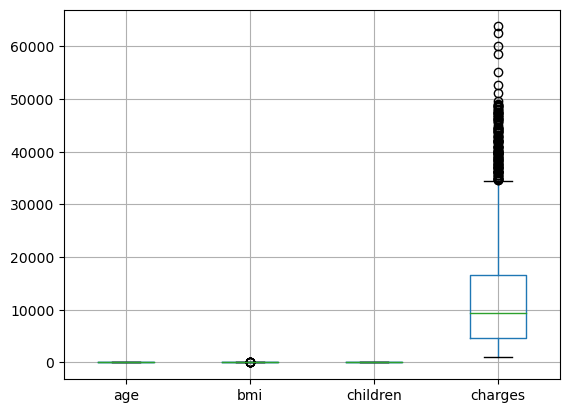

In [7]:
dataset.boxplot()

##### `Observation:` As we can see there are outliers present in charges columns.

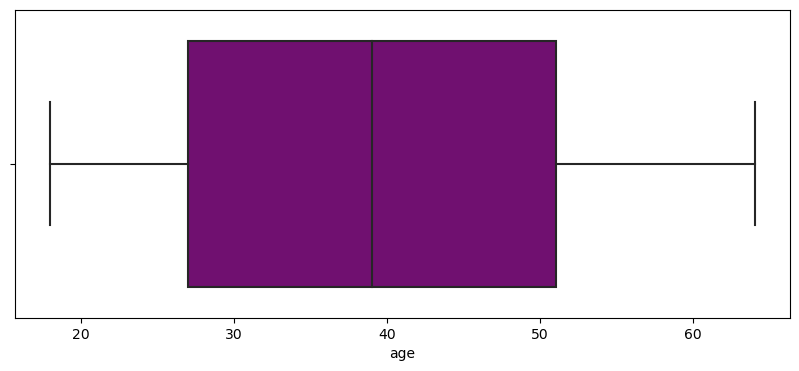

In [8]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "age", color = "purple")
plt.show()

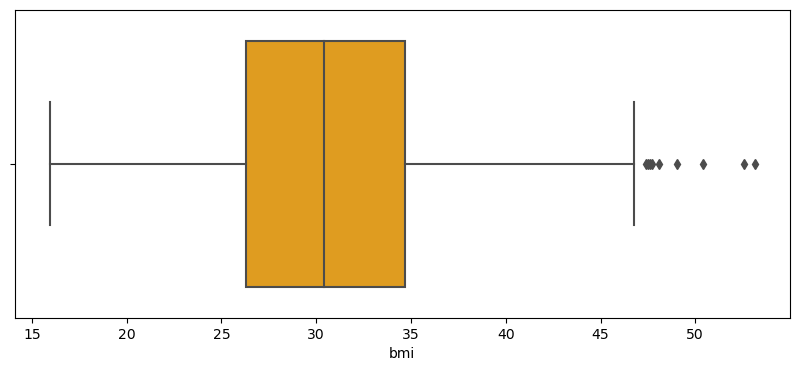

In [9]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "bmi", color = "orange")
plt.show()

##### `Observation:` There are outliers present in the bmi columns which need to be dealt with.

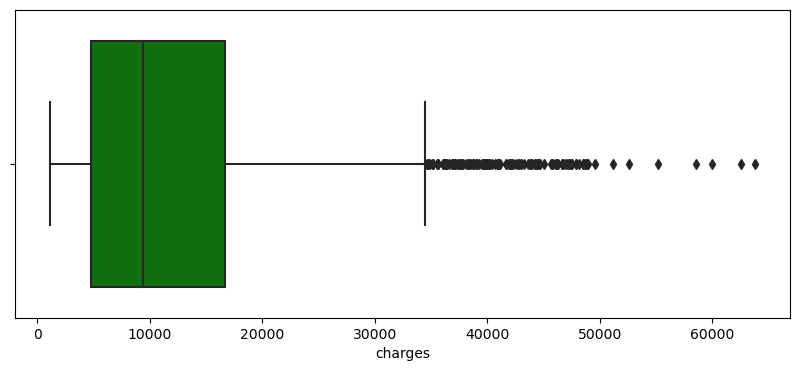

In [10]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "charges", color = "green")
plt.show()

##### `Observation:` There are a outliers present in charges column too which need to be dealt.

#### Handling the bmi Outliers:

In [11]:
Q1 = dataset["bmi"].quantile(q = 0.25)
Q1

26.29625

In [12]:
Q3 = dataset["bmi"].quantile(q = 0.75)
Q3

34.69375

In [13]:
IQR = Q3 - Q1
IQR

8.3975

In [14]:
lower_boundary = Q1 - (1.5 * IQR)
lower_boundary

13.7

In [15]:
upper_boundary = Q3 + (1.5 * IQR)
upper_boundary

47.290000000000006

In [16]:
lower_outliers = dataset[dataset["bmi"] < lower_boundary]
lower_outliers

,age,sex,bmi,children,smoker,region,charges


In [17]:
upper_outliers = dataset[dataset["bmi"] > upper_boundary]
upper_outliers

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [18]:
len(upper_outliers)

9

In [19]:
replace_dict = {}
for idx, row in upper_outliers.iterrows():
    if (row["bmi"] - upper_boundary) < 5:
        replace_dict[row["bmi"]] = upper_boundary

In [20]:
replace_dict

{49.06: 47.290000000000006,
 48.07: 47.290000000000006,
 47.52: 47.290000000000006,
 47.41: 47.290000000000006,
 50.38: 47.290000000000006,
 47.6: 47.290000000000006,
 47.74: 47.290000000000006}

In [21]:
dataset.replace(replace_dict, inplace = True)

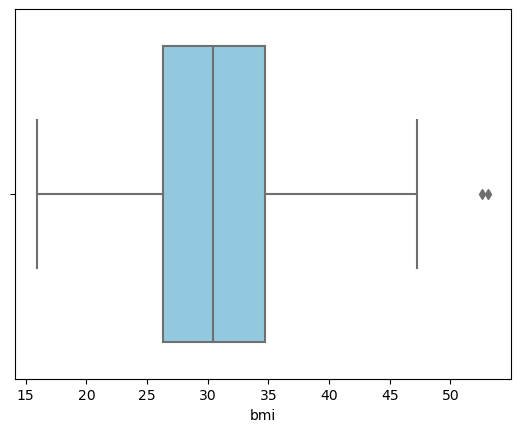

In [22]:
sns.boxplot(dataset, x = "bmi", color = "skyblue")
plt.show()

In [23]:
remaining_outliers = dataset[(dataset["bmi"] < lower_boundary) | (dataset["bmi"] > upper_boundary)]

In [24]:
remaining_outliers

,age,sex,bmi,children,smoker,region,charges
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [25]:
dataset.drop(remaining_outliers.index, inplace = True)

In [26]:
dataset.shape

(1336, 7)

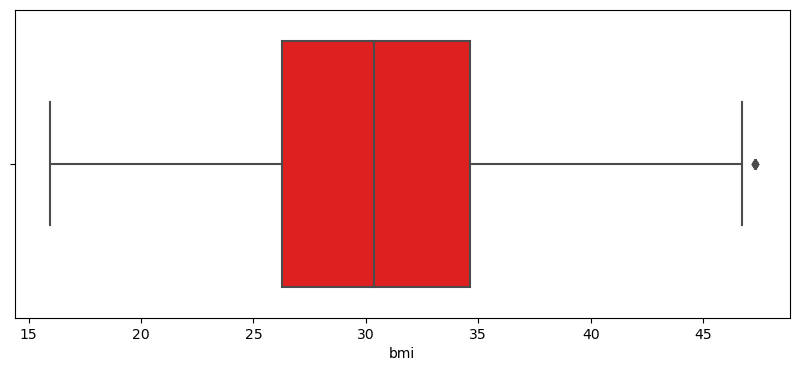

In [27]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "bmi", color = "r")
plt.show()

#### Handling the charges outliers:

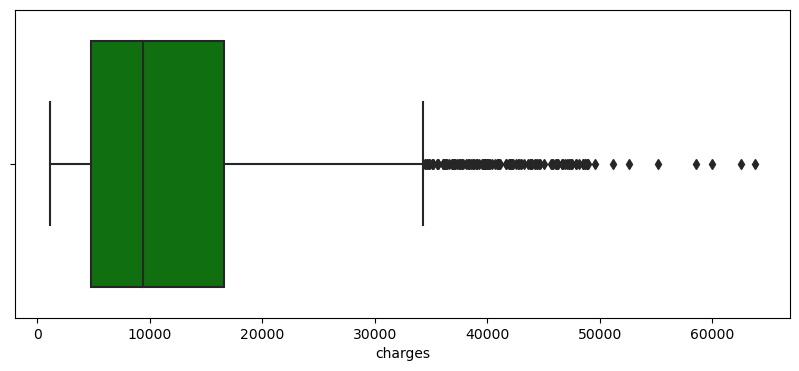

In [28]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "charges", color = "green")
plt.show()

In [29]:
Q1 = dataset["charges"].quantile(q = 0.25)
Q1

4744.32505

In [30]:
Q3 = dataset["charges"].quantile(q = 0.75)
Q3

16604.302645

In [31]:
IQR = Q3 - Q1
IQR

11859.977595

In [32]:
lower_boundary = Q1 - (2 * IQR)
lower_boundary

-18975.63014

In [33]:
upper_boundary = Q3 + (2 * IQR)
upper_boundary

40324.257835

In [34]:
lower_outliers = dataset[dataset["charges"] < lower_boundary]
lower_outliers

,age,sex,bmi,children,smoker,region,charges


In [35]:
upper_outliers = dataset[dataset["charges"] > upper_boundary]
upper_outliers

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
86,57,female,31.160,0,yes,northwest,43578.93940
94,64,female,31.300,2,yes,southwest,47291.05500
...,...,...,...,...,...,...,...
1241,64,male,36.960,2,yes,southeast,49577.66240
1284,61,male,36.300,1,yes,southwest,47403.88000
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325


In [36]:
replace_dict = {}
for idx, row in upper_outliers.iterrows():
    if (row["charges"] - upper_boundary) < 10000:
        replace_dict[row["charges"]] = upper_boundary

In [37]:
len(replace_dict)

67

In [38]:
dataset = dataset.replace(replace_dict)

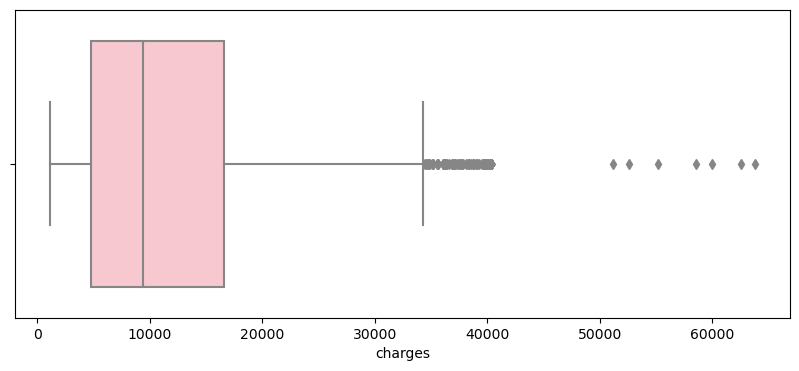

In [39]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "charges", color = "pink")
plt.show()

In [40]:
remaining_outliers = dataset[(dataset["charges"] < lower_boundary) | (dataset["charges"] > upper_boundary)]
remaining_outliers

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.290,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [41]:
len(remaining_outliers)/len(dataset)*100

0.5239520958083832

In [42]:
dataset.drop(remaining_outliers.index, inplace = True)

In [43]:
dataset.shape

(1329, 7)

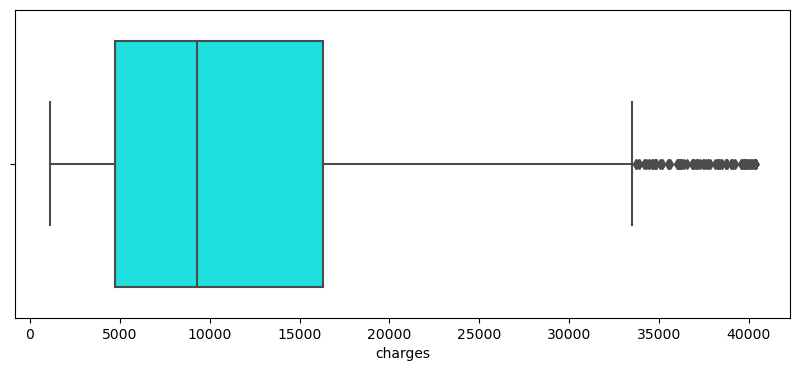

In [44]:
plt.figure(figsize = (10, 4))
sns.boxplot(dataset, x = "charges", color = "aqua")
plt.show()

In [45]:
summary_stats = dataset[["age", "bmi", "children", "charges"]].describe()

In [46]:
summary_stats

,age,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.214447,30.594586,1.097818,12797.704692
std,14.048643,6.017243,1.206560,11071.215591
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4719.736550
50%,39.000000,30.300000,1.000000,9301.893550
75%,51.000000,34.580000,2.000000,16297.846000
max,64.000000,47.290000,5.000000,40324.257835


In [47]:
quartiles = dataset[["age", "bmi", "children", "charges"]].quantile([0.25, 0.5, 0.75])

In [48]:
quartiles

,age,bmi,children,charges
0.25,27.0,26.22,0.0,4719.73655
0.50,39.0,30.30,1.0,9301.89355
0.75,51.0,34.58,2.0,16297.84600


In [49]:
std_dev = dataset[["age", "bmi", "children", "charges"]].std()

In [50]:
std_dev

age            14.048643
bmi             6.017243
children        1.206560
charges     11071.215591
dtype: float64

In [51]:
print("Symmary Statistica: ")
print(summary_stats)

print("\nQuartiles: ")
print(quartiles)

print("\nStandard Deviation: ")
print(std_dev)

Symmary Statistica: 
               age          bmi     children       charges
count  1329.000000  1329.000000  1329.000000   1329.000000
mean     39.214447    30.594586     1.097818  12797.704692
std      14.048643     6.017243     1.206560  11071.215591
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.220000     0.000000   4719.736550
50%      39.000000    30.300000     1.000000   9301.893550
75%      51.000000    34.580000     2.000000  16297.846000
max      64.000000    47.290000     5.000000  40324.257835

Quartiles: 
       age    bmi  children      charges
0.25  27.0  26.22       0.0   4719.73655
0.50  39.0  30.30       1.0   9301.89355
0.75  51.0  34.58       2.0  16297.84600

Standard Deviation: 
age            14.048643
bmi             6.017243
children        1.206560
charges     11071.215591
dtype: float64


### Exploratory Data Analysis:

#### Univariate Analysis:

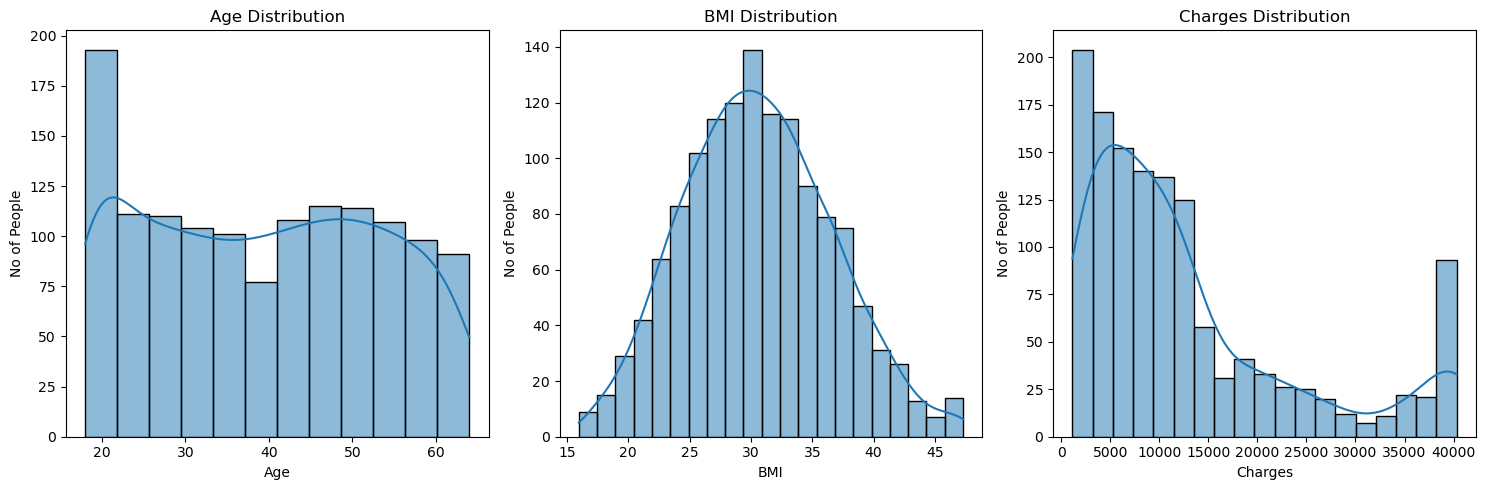

In [52]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.histplot(dataset, x = "age", kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("No of People")

plt.subplot(1, 3, 2)
sns.histplot(dataset, x = "bmi", kde = True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("No of People")

plt.subplot(1, 3, 3)
sns.histplot(dataset, x = "charges", kde = True)
plt.title("Charges Distribution")
plt.xlabel("Charges")
plt.ylabel("No of People")

plt.tight_layout()
plt.show()

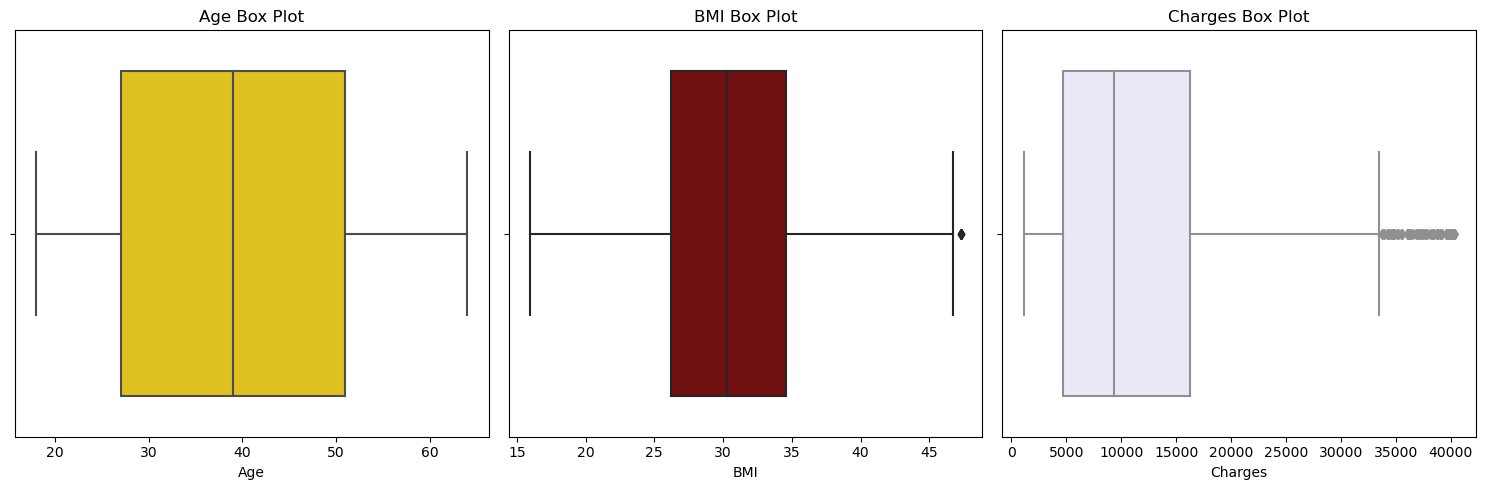

In [53]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(dataset, x = "age", color = "gold")
plt.title("Age Box Plot")
plt.xlabel("Age")

plt.subplot(1, 3, 2)
sns.boxplot(dataset, x = "bmi", color = "maroon")
plt.title("BMI Box Plot")
plt.xlabel("BMI")

plt.subplot(1, 3, 3)
sns.boxplot(dataset, x = "charges", color = "lavender")
plt.title("Charges Box Plot")
plt.xlabel("Charges")

plt.tight_layout()
plt.show()

#### Observations: 
- In the Age Distribution plot the datapoints are almost evenly spread across the various age group people, there is no any specific pattern.
- In the BMI Distribution plot the datapoints almost normally distributed. And most of the people are with the BMI between 25 to 35 which means most of the people are under overweight and obese category.
- In the Charges Distribution most of the people are with the average insurance charges between 5000 to 10000 dollor and there are few individuals with relatively high insurance charges around35000 to 40000 dollors which might indicates that the severe illness, specialized treatments etc.

#### Bivariate Analysis:

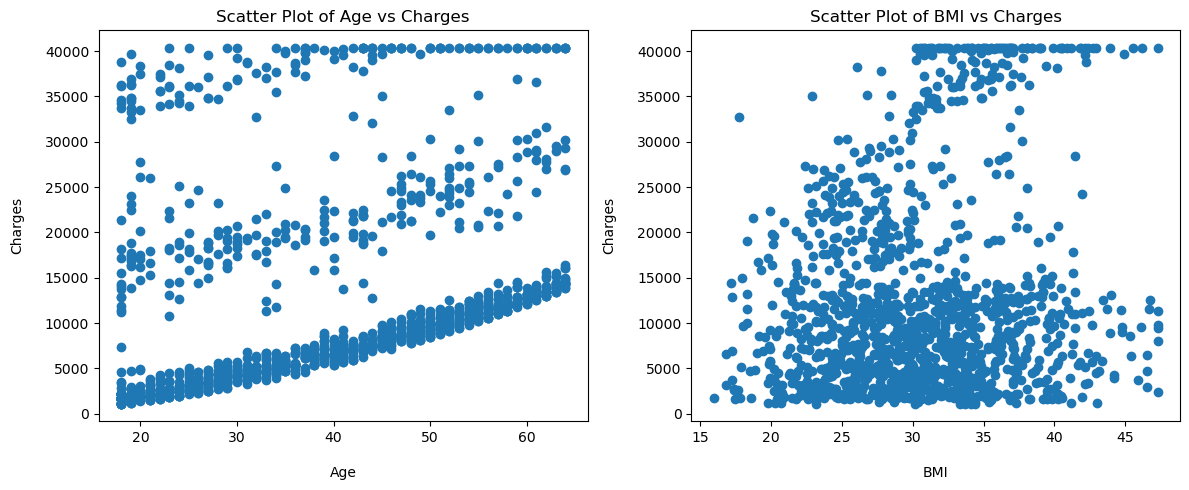

In [54]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.scatter(dataset["age"], dataset["charges"])
plt.xlabel("Age", labelpad = 15)
plt.ylabel("Charges", labelpad = 15)
plt.title("Scatter Plot of Age vs Charges")

plt.subplot(1, 2, 2)
plt.scatter(dataset["bmi"], dataset["charges"])
plt.xlabel("BMI", labelpad = 15)
plt.ylabel("Charges", labelpad = 15)
plt.title("Scatter Plot of BMI vs Charges")

plt.tight_layout()
plt.show()

#### Observation: 
- As the age and increases the insurance charges also increases, for the children insurance charges are very less, and for the young people the insurance charges are slightly higher comparativey whereas for the adult and the old people the insurance charges are very high.
- For the people with less BMI, insurance charges are less whereas for the people with more BMI insurance charges are comparatively very high.

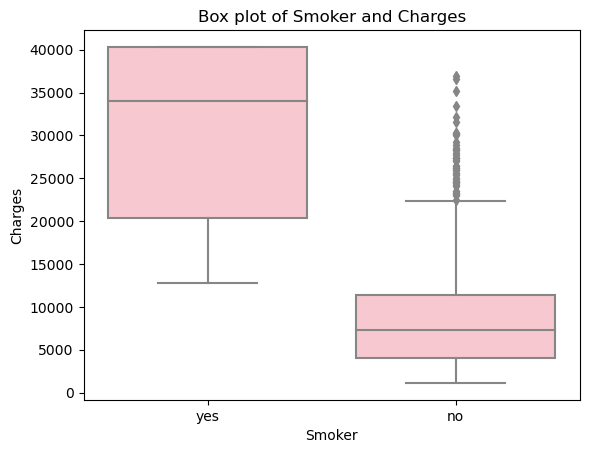

In [55]:
sns.boxplot(dataset, x = "smoker", y = "charges", color = "pink")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.title("Box plot of Smoker and Charges")
plt.show()

#### Observation:
- For the smoker it is clearly visible in the plot that the insurance charges are very high for them.
- For non-smoker people the insurance charges are very less comparatively however there are few outliers which show that very high insurance charges.

#### Multivariate Analysis:

In [56]:
corr = numerical_columns.corr()

In [57]:
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


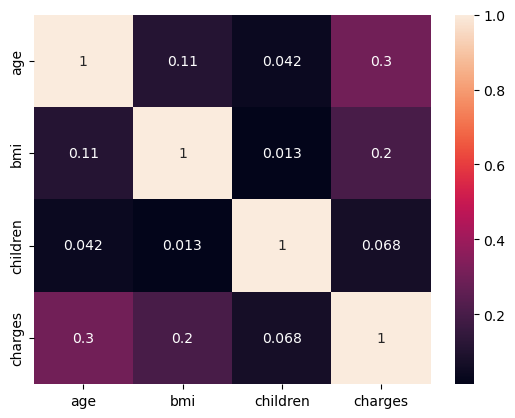

In [58]:
sns.heatmap(corr, annot = True)
plt.show()

#### Obsevation:
- There is a positive correlation between age and charges, as the age increase the insurance charges also increase.
- There is a positive correlation between bmi and charges as well. If BMI is more then the chances of getting sick is more which leads to increase in insurance charges.

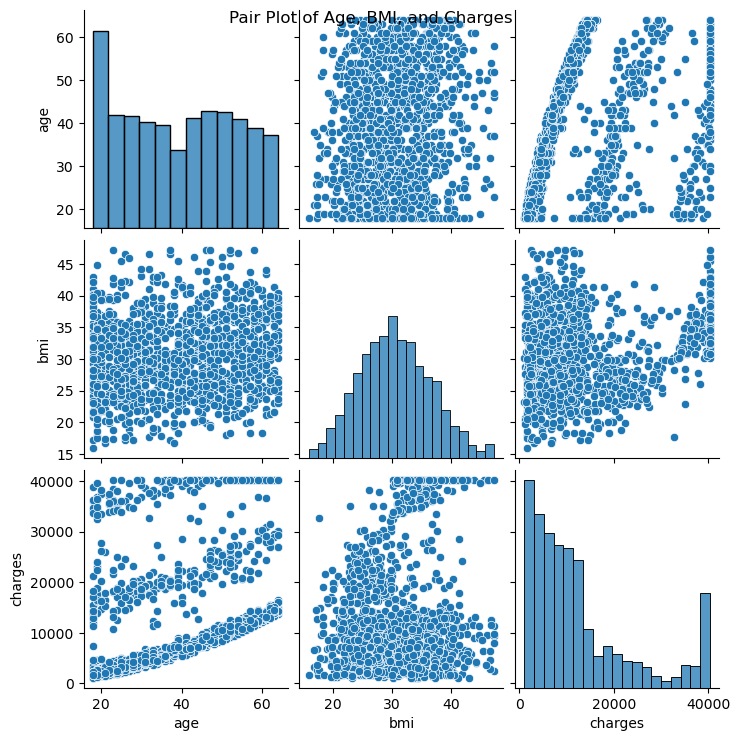

In [59]:
sns.pairplot(dataset, vars=["age", "bmi", "charges"])
plt.suptitle("Pair Plot of Age, BMI, and Charges", )
plt.show()


#### Observation:
- Age and charges are directly proportional to each other. If the age is increasing then the insurance charges are also increasing.

In [60]:
from mpl_toolkits.mplot3d import Axes3D

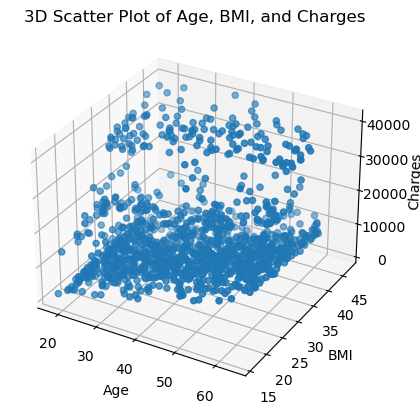

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset["age"], dataset["bmi"], dataset["charges"])
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Charges")
plt.title("3D Scatter Plot of Age, BMI, and Charges")
plt.show()

#### Recommendations:

- Encourage individuals with the higher BMI to adopt healthier lifestyle, including regular excercise  and balanced nutritions. Which will reduce the the risk of costly healthcare expenses.
- Regular check-up and screenings can help to detect and address health issue in the early stage.
- Support smoking cessation programs for smokers, as they are shown to have significantly higher insurance charges.
- Provide policyholders with educational resources on insurance coverage, healthcare costs, and the importance of regular check-ups.